In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

In [2]:
import scienceplots
plt.style.use('science')

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
from matplotlib.colors import LinearSegmentedColormap
colors = [
    [176, 91, 155],
    [150, 122, 173],
    [121, 95, 165],
    [96, 78, 166],
    [88, 95, 196],
    [91, 142, 215],
    [112, 169, 226],
    [142, 191, 240],
    [176, 211, 253],
    [101, 143, 204],
    [255, 189, 225],
    [125, 124, 124]
]
colors = np.array(colors) / 255.0
cmap = LinearSegmentedColormap.from_list("custom_diverging", colors, N=256)

mlp_color = colors[-2]
gnn_color = colors[0]  
segnn_color = colors[3]  
segnn_lmax2_color = colors[2] 
nequip_color = colors[6]  
nequip_lmax2_color = colors[5]  
egnn_color = colors[-1]
tpcf_color = np.array([255, 189, 225])/255.

In [4]:

n_list = [4, 64, 256, 1248, 6304,11200]

models_dir = Path('velocity_task_consistent_trees/')

def read_loss(model, n, dataset):
    with open(models_dir / f'{model}_{n}_f1.0' / f'loss_dict.pkl', 'rb') as f:
        f = pickle.load(f)
    return f[f'{dataset}_loss']


def get_losses_for_model(model, n_list):
    test_losses = []
    for n in n_list:
        test_losses.append(read_loss(model, n, 'test'))
    return test_losses

In [5]:


graph_task_dir = Path('graph_task')
graph_gnn_losses = np.load(graph_task_dir / 'GNN_losses.npy')
graph_segnn_losses = np.load(graph_task_dir / 'SEGNN_losses.npy')
graph_segnn_l2_losses = np.load(graph_task_dir / 'SEGNN_lmax2_losses.npy')
graph_nequip_losses = np.load(graph_task_dir / 'NequIP_losses.npy')
graph_nequip_l2_losses = np.load(graph_task_dir / 'NequIP_lmax2_losses.npy')
tpcf_losses = np.load(graph_task_dir / '2PCF_losses.npy')

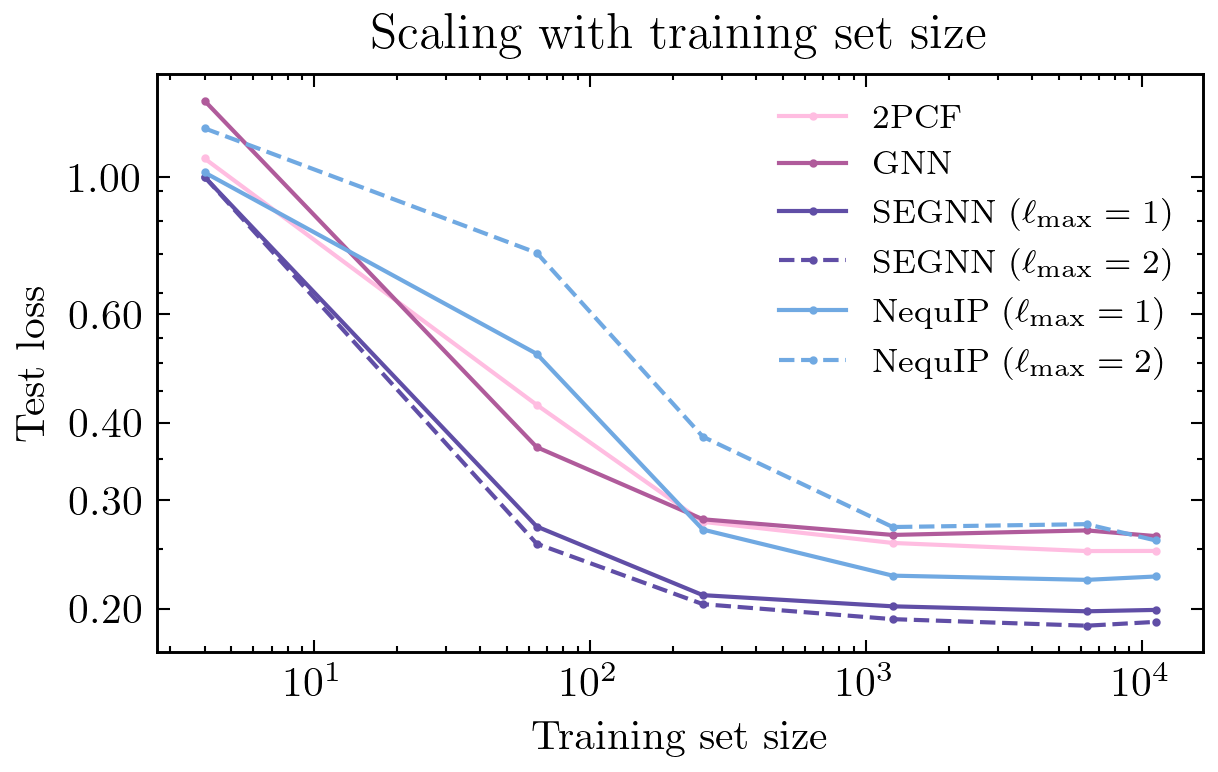

In [6]:
# Custom ScalarFormatter to avoid scientific notation
from matplotlib.ticker import FixedLocator, FuncFormatter


plt.figure(figsize=(4.5, 2.5))

# Plotting the data without using loglog
plt.plot(n_list, tpcf_losses, marker='o', markersize=1, label='2PCF', color=tpcf_color)
plt.plot(n_list, graph_gnn_losses, marker='o', markersize=1, label='GNN', color=gnn_color)
plt.plot(n_list, graph_segnn_losses, marker='o', markersize=1, label='SEGNN ($\ell_\mathrm{max}=1$)', color=segnn_color)
plt.plot(n_list, graph_segnn_l2_losses, marker='o', markersize=1, label='SEGNN ($\ell_\mathrm{max}=2$)', color=segnn_color, linestyle='dashed')
plt.plot(n_list, graph_nequip_losses, marker='o', markersize=1, label='NequIP ($\ell_\mathrm{max}=1$)', color=nequip_color)
plt.plot(n_list, graph_nequip_l2_losses, marker='o', markersize=1, label='NequIP ($\ell_\mathrm{max}=2$)', color=nequip_color, linestyle='dashed')

plt.legend(fontsize=8)
plt.ylabel('Test loss')
plt.xlabel('Training set size')
plt.title('Scaling with training set size')

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

major_ticks = [0.2, 0.3, 0.4, 0.6, 1.0]
minor_ticks = [0.25, 0.35, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.95]

ax = plt.gca()
ax.yaxis.set_major_locator(FixedLocator(major_ticks))
ax.yaxis.set_minor_locator(FixedLocator(minor_ticks))
ax.set_yticks(major_ticks)  # Explicitly set major ticks
ax.set_yticks(minor_ticks, minor=True)  # Explicitly set minor ticks

# Function to format the ticks without scientific notation
def plain_format(x, pos):
    return '{:0.2f}'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(plain_format))

# Adjust the spine linewidth
for spine in ax.spines.values():
    spine.set_linewidth(0.7)

# Clear any default tick labels that might be overlapping
ax.yaxis.set_tick_params(which='both', labelleft=True)
ax.yaxis.set_minor_formatter(plt.NullFormatter())

plt.savefig('figures/scaling_graph_task.pdf', bbox_inches='tight')


In [7]:
gnn_losses = read_loss('gnn', 1248, 'train',)
segnn_losses = read_loss('segnn', 1248, 'train',)
segnn_lmax2_losses = read_loss('segnn_l2', 1248,'train')
nequip_losses = read_loss('nequip', 1248, 'train',)
nequip_lmax2_losses = read_loss('nequip_l2', 1248, 'train',)

test_gnn_losses = read_loss('gnn', 1248, 'test',)
test_segnn_losses = read_loss('segnn', 1248, 'test',)
test_segnn_lmax2_losses = read_loss('segnn_l2', 1248,'test')
test_nequip_losses = read_loss('nequip', 1248, 'test',)
test_nequip_lmax2_losses = read_loss('nequip_l2', 1248, 'test',)



In [ ]:
test_nequip_lmax2_losses

array(2.4443314, dtype=float32)

In [9]:
# import matplotlib.patches as mpatches

# ds = 20
# plt.figure(figsize=(4., 2.7)) 
# plt.axhline(test_gnn_losses, color=gnn_color, linestyle='--', alpha=0.5)
# plt.axhline(test_segnn_losses, color=segnn_color, linestyle='--', alpha=0.5)
# plt.axhline(test_segnn_lmax2_losses, color=segnn_lmax2_color, linestyle='--', alpha=0.5)
# plt.axhline(test_nequip_losses, color=nequip_color, linestyle='--', alpha=0.5)
# plt.axhline(test_nequip_lmax2_losses, color=nequip_lmax2_color, linestyle='--', alpha=0.5)
# plt.plot(np.convolve(gnn_losses, np.ones(ds)/ds, mode='valid'), label='GNN', color=gnn_color)
# plt.plot(np.convolve(segnn_losses, np.ones(ds)/ds, mode='valid'),  label='SEGNN ($\ell_\mathrm{max}=1$)',  color=segnn_color)
# plt.plot(np.convolve(segnn_lmax2_losses, np.ones(ds)/ds, mode='valid'), label='SEGNN ($\ell_\mathrm{max}=2$)', color=segnn_lmax2_color)
# plt.plot(np.convolve(nequip_losses, np.ones(ds)/ds, mode='valid'),  label='NequIP ($\ell_\mathrm{max}=1$)', color=nequip_color)
# plt.plot(np.convolve(nequip_lmax2_losses, np.ones(ds)/ds, mode='valid'),  label='NequIP ($\ell_\mathrm{max}=2$)', color=nequip_lmax2_color)
# plt.legend(fontsize=8, fancybox=True)
# plt.ylabel('Train loss')
# plt.xlabel('Step')
# plt.title('Node Task: Velocity Prediction', fontsize=10, fontweight='bold')
# ax = plt.gca()
# for spine in ax.spines.values():
#     spine.set_linewidth(0.7) 
# plt.ylim(1.8,8.)

# arrow = mpatches.FancyArrowPatch((1000, 6), (800, 6),
#                                  mutation_scale=10)
# ax.add_patch(arrow)



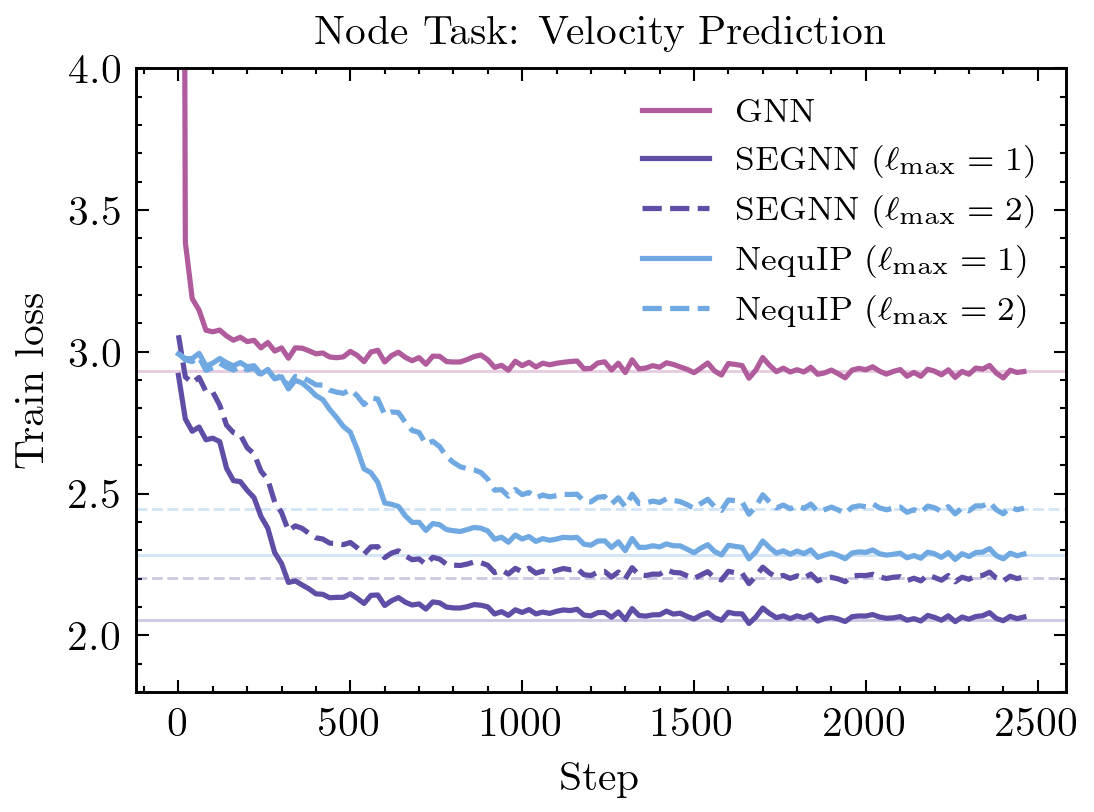

In [10]:

skip = 20
ds = 30
plt.figure(figsize=(4., 2.7)) 
plt.axhline(test_gnn_losses, color=gnn_color, linestyle='--', alpha=0.5)
plt.axhline(test_segnn_losses, color=segnn_color, linestyle='--', alpha=0.5)
plt.axhline(test_segnn_lmax2_losses, color=segnn_lmax2_color, linestyle='--', alpha=0.5)
plt.axhline(test_nequip_losses, color=nequip_color, linestyle='--', alpha=0.5)
plt.axhline(test_nequip_lmax2_losses, color=nequip_lmax2_color, linestyle='--', alpha=0.5)
plt.plot(np.convolve(gnn_losses, np.ones(ds)/ds, mode='valid'), label='GNN', color=gnn_color)
plt.plot(np.convolve(segnn_losses, np.ones(ds)/ds, mode='valid'),  label='SEGNN ($\ell_\mathrm{max}=1$)',  color=segnn_color)
plt.plot(np.convolve(segnn_lmax2_losses, np.ones(ds)/ds, mode='valid'), label='SEGNN ($\ell_\mathrm{max}=2$)', color=segnn_lmax2_color)
plt.plot(np.convolve(nequip_losses, np.ones(ds)/ds, mode='valid'),  label='NequIP($\ell_\mathrm{max}=1$)', color=nequip_color)
plt.plot(np.convolve(nequip_lmax2_losses, np.ones(ds)/ds, mode='valid'),  label='NequIP($\ell_\mathrm{max}=2$)', color=nequip_lmax2_color)
plt.legend(fontsize=8, frameon=True, fancybox=True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.title('Node Task: Velocity Prediction', fontsize=10, fontweight='bold')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.7) 
plt.ylim(1.8,4.)



plt.savefig('figures/velocity_train_loss.pdf', bbox_inches='tight')

# Graph task

In [10]:
n_list = [4, 64, 256, 1248, 6304, 11200]

models_dir = Path('experiments/')

def read_loss(model, n, dataset, l_max = None):
    expt_dir = f'{model}_N={n}'
    if model != 'MLP':
        expt_dir += '_tpcf=none'
    else:
        expt_dir += '_tpcf=all'
        
    if l_max != None:
        expt_dir += f'_lmax={l_max}'
        
    with open(models_dir / expt_dir / f'loss_dict.pkl', 'rb') as f:
        f = pickle.load(f)
    return np.array(f[f'{dataset}_loss'])

def get_losses_for_model(model, n_list, l_max=None):
    test_losses = []
    for n in n_list:
        test_losses.append(read_loss(model, n, 'test', l_max).mean())
    return np.array(test_losses)

In [11]:
mlp_losses = get_losses_for_model('MLP', n_list)*0.11545**2
gnn_losses = get_losses_for_model('GNN', n_list)*0.11545**2
segnn_losses = get_losses_for_model('SEGNN', n_list)*0.11545**2
nequip_losses = get_losses_for_model('NequIP', n_list)*0.11545**2
segnn_lmax2_losses = get_losses_for_model('SEGNN', n_list, l_max=2)*0.11545**2
nequip_lmax2_losses = get_losses_for_model('NequIP', n_list, l_max=2)*0.11545**2
egnn_losses = get_losses_for_model('EGNN', n_list)

In [6]:
# np.save('2PCF_losses', mlp_losses)
# np.save('GNN_losses', gnn_losses)
# np.save('SEGNN_losses', segnn_losses)
# np.save('SEGNN_lmax2_losses', segnn_lmax2_losses)
# np.save('NequIP_losses', nequip_losses)
# np.save('NequIP_lmax2_losses', nequip_lmax2_losses)
# np.save('EGNN_losses', egnn_losses)

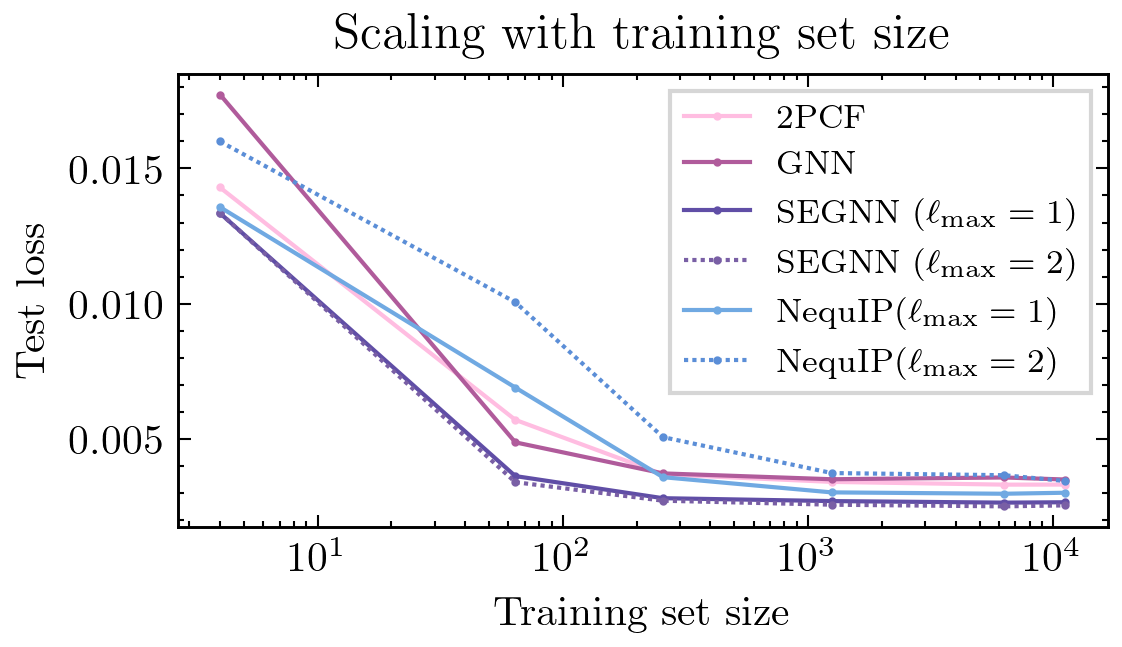

In [15]:
plt.figure(figsize=(4., 2), dpi=300) 
plt.semilogx(n_list, mlp_losses, marker='o', markersize=1, label='2PCF', color=mlp_color)
plt.semilogx(n_list, gnn_losses, marker='o', markersize=1, label='GNN', color=gnn_color)
plt.semilogx(n_list, segnn_losses, marker='o', markersize=1, label='SEGNN ($\ell_\mathrm{max}=1$)', color=segnn_color)
plt.semilogx(n_list, segnn_lmax2_losses, marker='o', markersize=1, label='SEGNN ($\ell_\mathrm{max}=2$)', color=segnn_lmax2_color, linestyle=(0, (1, 1)))
plt.semilogx(n_list, nequip_losses, marker='o', markersize=1, label='NequIP($\ell_\mathrm{max}=1$)', color=nequip_color)
plt.semilogx(n_list, nequip_lmax2_losses, marker='o', markersize=1, label='NequIP($\ell_\mathrm{max}=2$)', color=nequip_lmax2_color, linestyle=(0, (1, 1)))
# plt.semilogx(n_list, egnn_losses, marker='o', markersize=1, label='EGNN', color=egnn_color)
plt.legend(fontsize=8, frameon=True, fancybox=False)
# plt.ylim(0.15,2.3)
plt.ylabel('Test loss')
plt.xlabel('Training set size')
plt.title('Scaling with training set size')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.7) 
plt.savefig('figures/graph_scaling_task.pdf', bbox_inches='tight')

In [16]:
mlp_losses = read_loss('MLP', 1248, 'train',)[:2500].mean(axis=1)
gnn_losses = read_loss('GNN', 1248, 'train',).mean(axis=1)
segnn_losses = read_loss('SEGNN', 1248, 'train',).mean(axis=1)
segnn_lmax2_losses = read_loss('SEGNN', 1248,'train', l_max=2).mean(axis=1)
nequip_losses = read_loss('NequIP', 1248, 'train',).mean(axis=1)
nequip_lmax2_losses = read_loss('NequIP', 1248, 'train',l_max=2).mean(axis=1)
egnn_losses = read_loss('EGNN', 1248, 'train').mean(axis=1)

mlp_val_losses = read_loss('MLP', 1248, 'val',)[:2500]
gnn_val_losses = read_loss('GNN', 1248, 'val',)
segnn_val_losses = read_loss('SEGNN', 1248, 'val',)
segnn_val_lmax2_losses = read_loss('SEGNN', 1248,'val', l_max=2)
nequip_val_losses = read_loss('NequIP', 1248, 'val',)
nequip_val_lmax2_losses = read_loss('NequIP', 1248, 'val',l_max=2)
egnn_val_losses = read_loss('EGNN', 1248, 'val')

test_mlp_losses = read_loss('MLP', 1248, 'test',)[:2500]
test_gnn_losses = read_loss('GNN', 1248, 'test',)
test_segnn_losses = read_loss('SEGNN', 1248, 'test',)
test_segnn_lmax2_losses = read_loss('SEGNN', 1248,'test',l_max=2)
test_nequip_losses = read_loss('NequIP', 1248, 'test',)
test_nequip_lmax2_losses = read_loss('NequIP', 1248, 'test',l_max=2)
test_egnn_losses = read_loss('EGNN', 1248, 'test')

In [14]:
print('MLP', test_mlp_losses * np.array([0.11547888,0.11545073])**2 )
print('GNN', test_gnn_losses * np.array([0.11547888,0.11545073])**2 )
print('EGNN', test_egnn_losses * np.array([0.11547888,0.11545073])**2 )
print('SEGNN (lmax=1)',test_segnn_losses * np.array([0.11547888,0.11545073])**2 )
print('SEGNN (lmax=2)',test_segnn_lmax2_losses * np.array([0.11547888,0.11545073])**2 )
print('NequIP (lmax=1)',test_nequip_losses * np.array([0.11547888,0.11545073])**2 )
print('NequIP (lmax=2)',test_nequip_lmax2_losses * np.array([0.11547888,0.11545073])**2 )

MLP [[0.00209004 0.00472492]]
GNN [[0.0027808  0.00423053]]
EGNN [0.01335431 0.0133478 ]
SEGNN (lmax=1) [[0.00248426 0.00291212]]
SEGNN (lmax=2) [[0.00241966 0.00270807]]
NequIP (lmax=1) [[0.00262982 0.00340958]]
NequIP (lmax=2) [[0.00284705 0.00462295]]


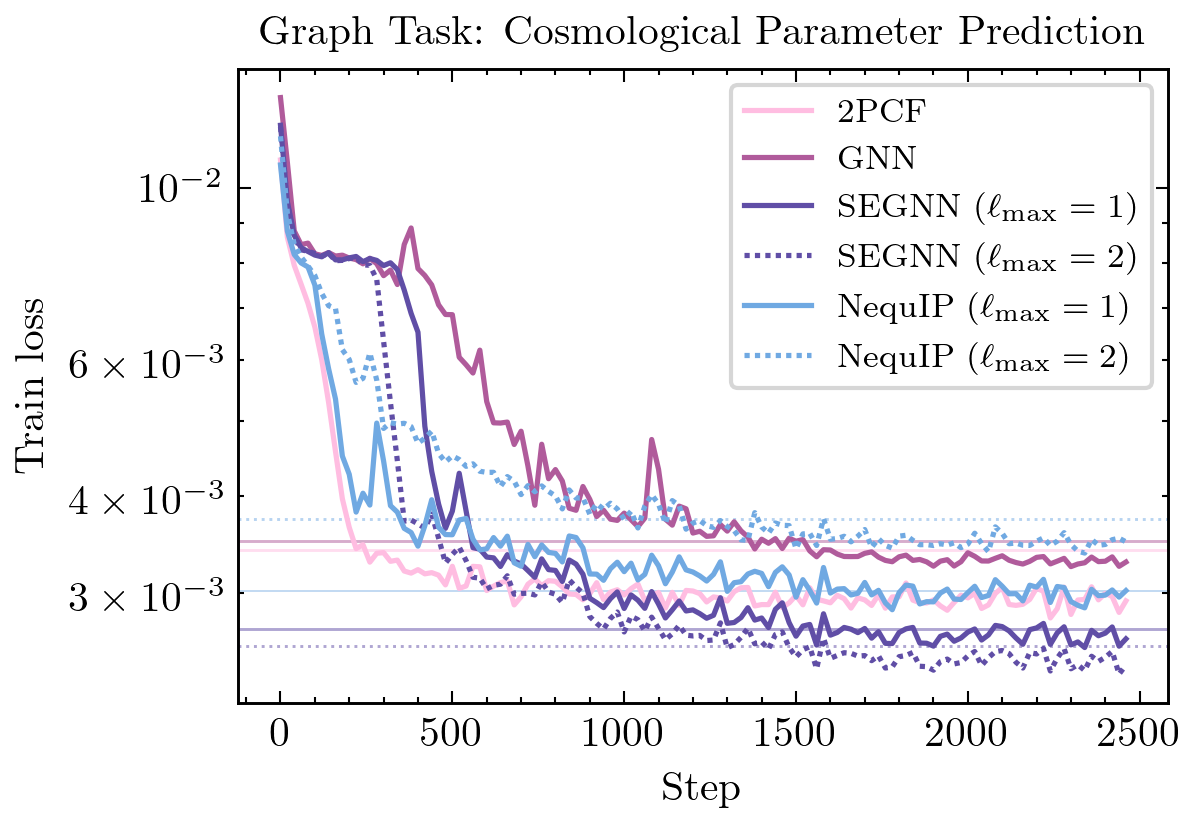

In [31]:
skip = 20
ds = 30
plt.figure(figsize=(4., 2.8), dpi=300) 
plt.axhline(test_mlp_losses.mean()*0.11545**2, color=mlp_color,  alpha=0.5, linewidth=0.7,)
plt.axhline(test_gnn_losses.mean()*0.11545**2, color=gnn_color,  alpha=0.5, linewidth=0.7,)
plt.axhline(test_segnn_losses.mean()*0.11545**2, color=segnn_color,  alpha=0.5,linewidth=0.7,)
plt.axhline(test_segnn_lmax2_losses.mean()*0.11545**2, color=segnn_color, linestyle='dotted', alpha=0.5, linewidth=0.7,)
plt.axhline(test_nequip_losses.mean()*0.11545**2, color=nequip_color, alpha=0.5, linewidth=0.4,)
plt.axhline(test_nequip_lmax2_losses.mean()*0.11545**2, color=nequip_color, linestyle='dotted', alpha=0.5, linewidth=0.7,)

convolved_loss = np.convolve(gnn_losses, np.ones(ds)/ds, mode='valid')
plt.semilogy(range(0,len(convolved_loss), skip),np.convolve(mlp_losses, np.ones(ds)/ds, mode='valid')[::skip]*0.11545**2, label='2PCF', color=mlp_color, linewidth=1.25)
plt.semilogy(range(0,len(convolved_loss), skip),np.convolve(gnn_losses, np.ones(ds)/ds, mode='valid')[::skip]*0.11545**2, label='GNN', color=gnn_color, linewidth=1.25)
plt.semilogy(range(0,len(convolved_loss), skip),np.convolve(segnn_losses, np.ones(ds)/ds, mode='valid')[::skip]*0.11545**2,  label='SEGNN ($\ell_\mathrm{max}=1$)',  color=segnn_color,linewidth=1.25)
plt.semilogy(range(0,len(convolved_loss), skip),np.convolve(segnn_lmax2_losses, np.ones(ds)/ds, mode='valid')[::skip]*0.11545**2, label='SEGNN ($\ell_\mathrm{max}=2$)', color=segnn_color, linestyle=(0, (1, 1)),linewidth=1.25)
plt.semilogy(range(0,len(convolved_loss), skip),np.convolve(nequip_losses, np.ones(ds)/ds, mode='valid')[::skip]*0.11545**2,  label='NequIP ($\ell_\mathrm{max}=1$)', color=nequip_color,linewidth=1.25)
plt.semilogy(range(0,len(convolved_loss), skip),np.convolve(nequip_lmax2_losses, np.ones(ds)/ds, mode='valid')[::skip]*0.11545**2,  label='NequIP ($\ell_\mathrm{max}=2$)', color=nequip_color, linestyle=(0, (1, 1)),linewidth=1.25)
plt.legend(fontsize=8, fancybox=True, frameon=True)
plt.ylabel('Train loss')
plt.xlabel('Step')
plt.title('Graph Task: Cosmological Parameter Prediction', fontsize=10, fontweight='bold')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.7) 
# plt.ylim(1.8,4.)
# plt.xlim(0, 2500)
plt.savefig('figures/graph_train_loss.pdf', bbox_inches='tight')
plt.show()